In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt


# Use github rawdata to get the up-to-date data
csvfile = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
data = pd.read_csv(csvfile)

In [3]:
# take a peek into how the data looks like
data.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,12/30/22,12/31/22,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,1/6/23,1/7/23,1/8/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,18961,18961,18961,18961,18961,19205,19205,19205,19205,19205
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,67496,67496,67496,67496,67496,68182,68182,68182,68182,68182
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7027,7027,7027,7027,7027,7120,7120,7120,7120,7120
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,7692,7692,7692,7692,7692,7808,7808,7808,7808,7808
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,17731,17731,17731,17731,17731,17952,17952,17952,17952,17952


In [4]:
# get some general idea about the information about the data stored in the csv
data.isnull().sum()

UID        0
iso2       0
iso3       0
code3      0
FIPS      10
          ..
1/4/23     0
1/5/23     0
1/6/23     0
1/7/23     0
1/8/23     0
Length: 1094, dtype: int64

In [5]:
data.dtypes

UID         int64
iso2       object
iso3       object
code3       int64
FIPS      float64
           ...   
1/4/23      int64
1/5/23      int64
1/6/23      int64
1/7/23      int64
1/8/23      int64
Length: 1094, dtype: object

In [123]:
# number of rows and columns
data.shape

(3342, 1093)

## Covid 19 case for a selected state

In [44]:
def organize_data_for_a_state(
    raw_data, 
    us_state,
    counties = None,
    show_plot=True,
    from_time=None,
    to_time=None,
) -> pd.DataFrame:
    """Get the time series data one a given state, and organize it
    by removing the unnecessary data.
    """
    df = raw_data[raw_data["Province_State"] == us_state]
    df.index = df["Admin2"]
    df = df.iloc[:, 11:]
    df = df.T
    df.index = pd.to_datetime(df.index)
    if counties:
        df = df[counties]
    
    if not from_time:
        from_time = df.index[0]
    if not to_time:
        to_time = df.index[-1]
    
    df = df[df.index.to_series().between(from_time, to_time)]
        
    if show_plot:
        plt.figure(figsize=(12, 7))
        plt.plot(df)
        plt.legend(df.columns, loc='center left', bbox_to_anchor=(1,0.5))
        plt.title(f"Confirmed COVID cases in {us_state}")
        plt.show()
    return df
    

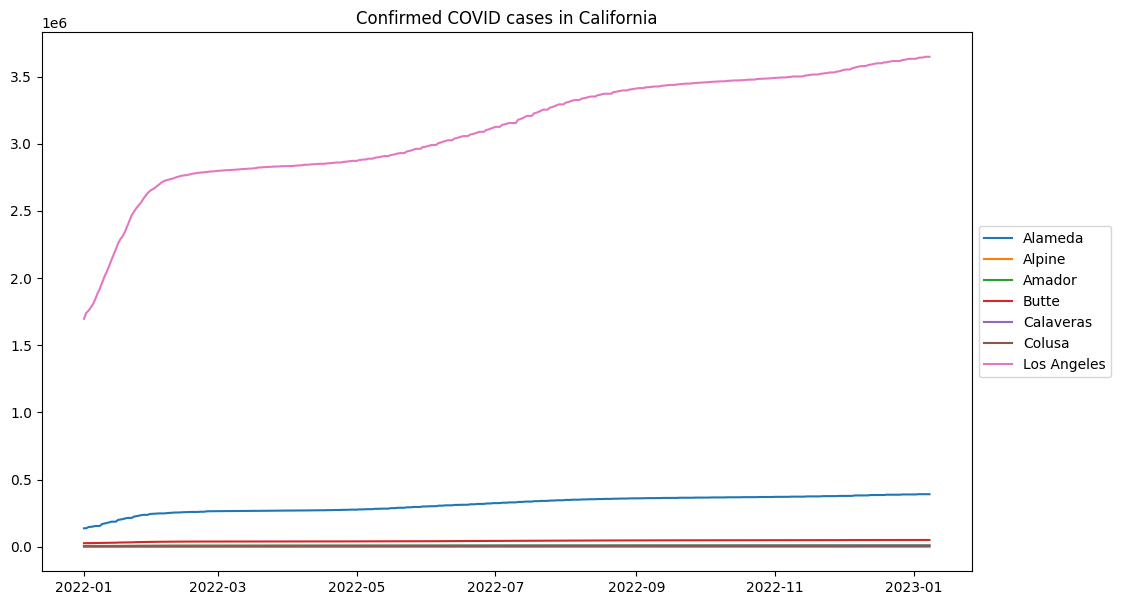

In [45]:
# For example
california = organize_data_for_a_state(
    raw_data=data, 
    us_state="California",
    counties=['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa', 'Los Angeles'],
    from_time=dt.datetime(year=2022, month=1, day=1),
)

## Covid19 cases for all states

In [46]:
df2 = data.drop([
    'UID',
    'code3',
    'FIPS',
    'Lat',
    'Long_',
    'iso2',
    'iso3',
    'Admin2',
    'Country_Region',
    'Combined_Key',
], axis=1)
df2 = df2.groupby("Province_State").sum()
df2 = df2.T
df2.index = pd.to_datetime(df2.index)
df2.head()

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-26,0,0,0,1,0,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


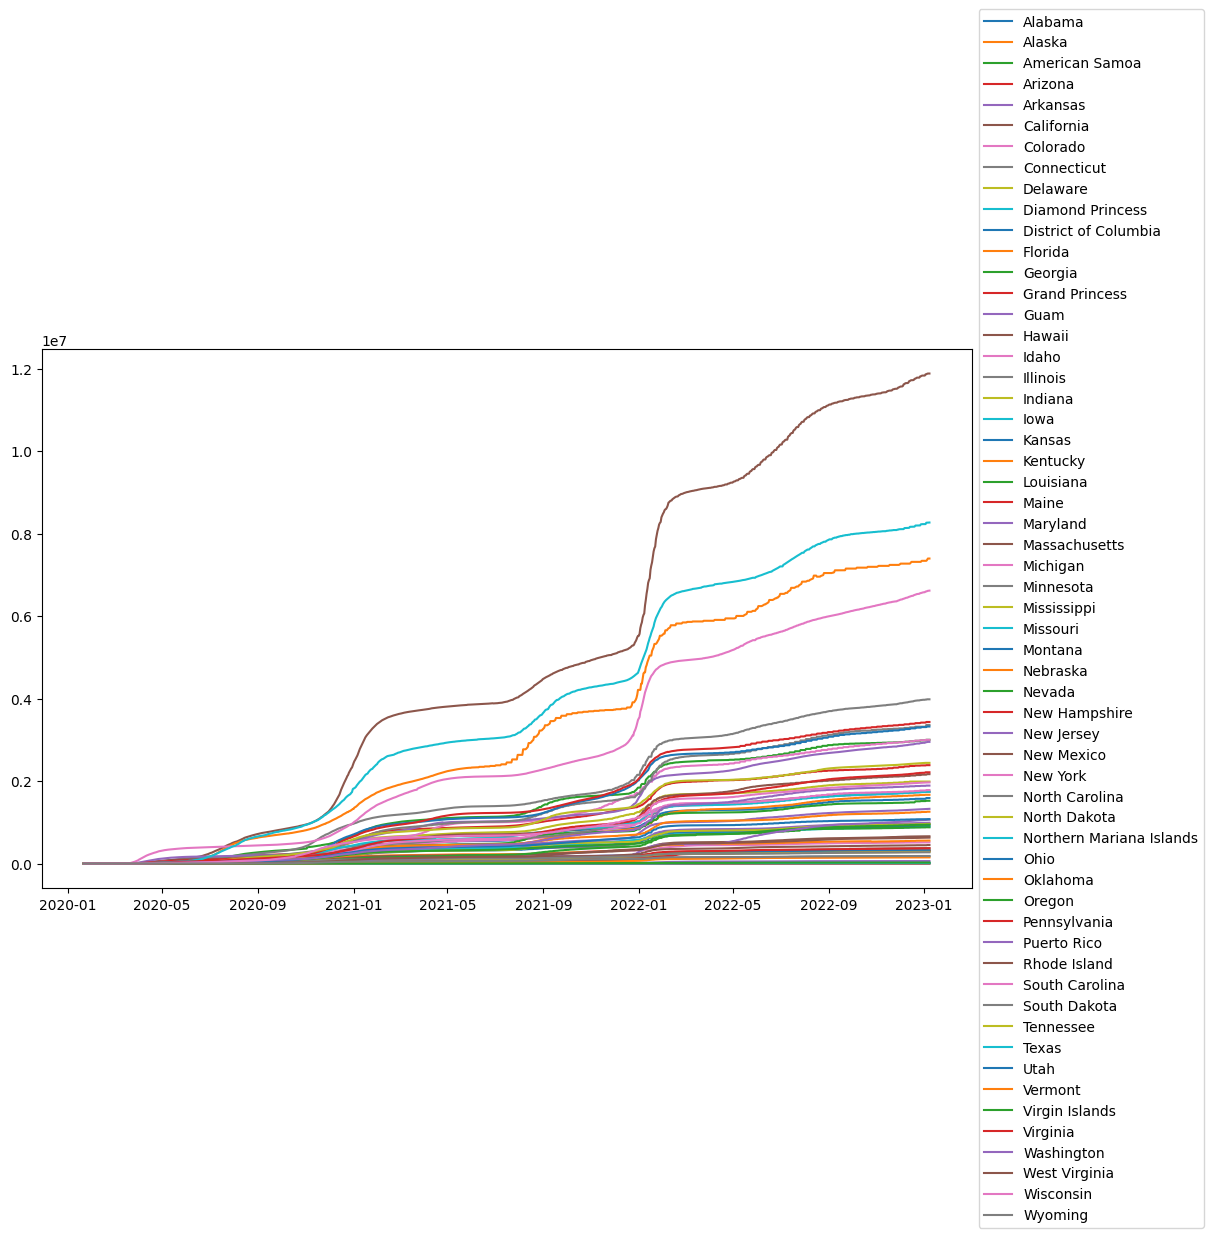

In [43]:
plt.figure(figsize=(12, 7))
plt.plot(df2)
plt.legend(df2.columns, loc='center left', bbox_to_anchor=(1,0.5))
plt.show()